In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
from PIL import Image
import os,glob

print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


In [3]:
import random

In [4]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized")
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료")

200 images to be resized
200 images resized
가위 이미지 resize 완료
200 images to be resized
200 images resized
바위 이미지 resize 완료
200 images to be resized
200 images resized
보 이미지 resize 완료


In [5]:
def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


라벨:  0


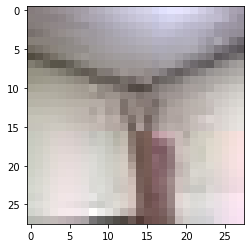

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [7]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_test"
resize_images(image_dir_path)

print("rock_test 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_test"
resize_images(image_dir_path)

print("scissor_test 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_test"
resize_images(image_dir_path)

print("paepr_test 이미지 resize 완료!")

100  images to be resized.
100  images resized.
rock_test 이미지 resize 완료!
100  images to be resized.
100  images resized.
scissor_test 이미지 resize 완료!
100  images to be resized.
100  images resized.
paepr_test 이미지 resize 완료!


In [8]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm))

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [45]:
n_channel_1=54
n_channel_2=108
n_channel_3=216
n_dense=216
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model에 추가된 Layer 개수:  9
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 54)        1512      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 13, 13, 54)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 12, 12, 108)       23436     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 6, 6, 108)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 4, 4, 216)         210168    
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 2, 2, 216)         0         
_________________________________________________________________
flatten_34 (Flatten)         

model.predict() 결과 :  [9.998734e-01 1.223450e-04 4.268370e-06]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


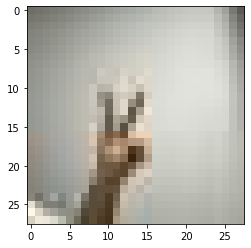

In [43]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

잘 못 분류한 테스트 데이터 수 : 106
예측확률분포: [0.04122167 0.9576854  0.00109286]
라벨: 2, 예측결과: 1


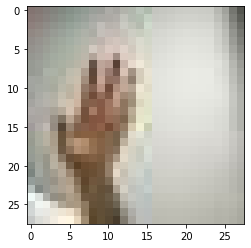

예측확률분포: [9.2278981e-01 7.6983735e-02 2.2639129e-04]
라벨: 2, 예측결과: 0


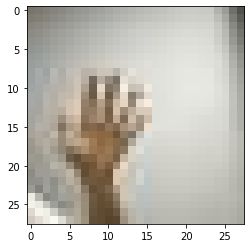

예측확률분포: [1.3923479e-02 9.8600906e-01 6.7514658e-05]
라벨: 2, 예측결과: 1


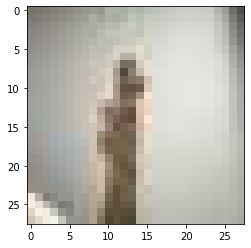

예측확률분포: [4.7521538e-01 5.2457446e-01 2.1019549e-04]
라벨: 2, 예측결과: 1


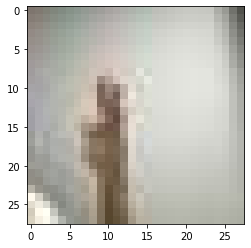

예측확률분포: [9.9896920e-01 8.8219607e-04 1.4859519e-04]
라벨: 2, 예측결과: 0


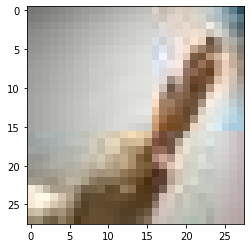

In [44]:
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

print("잘 못 분류한 테스트 데이터 수 :", len(wrong_predict_list))
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()